# SKULL STRIPPING

In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
from sklearn.preprocessing import MinMaxScaler #to scale image pixels
import pandas as pd
from skimage.filters import gaussian
import cv2
from scipy.signal import convolve2d
from skimage import io, img_as_float
from skimage.segmentation import active_contour
scaler = MinMaxScaler()

DATASET_PATH = "C:/Users/jasmine/Desktop/graduation project/data/"

#load single image as numpy array
test_image_AD=nib.load( DATASET_PATH+ "AD_T2/ADNI/002_S_0619/Axial_PD_T2_FSE/2006-06-01_20_16_38.0/S15207/ADNI_002_S_0619_MR_Axial_PD_T2_FSE__br_raw_20060605133200599_2_S15207_I16498.nii").get_fdata()   # fdata Extract data as numpy ndarray


Ii=test_image_AD [:, :, 20,0]
Ii.shape
Ii.max()

4705.0

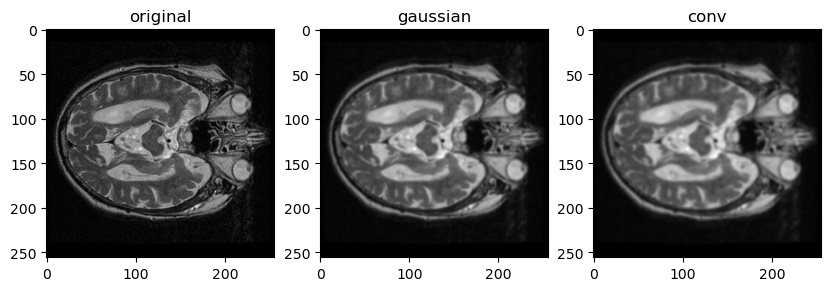

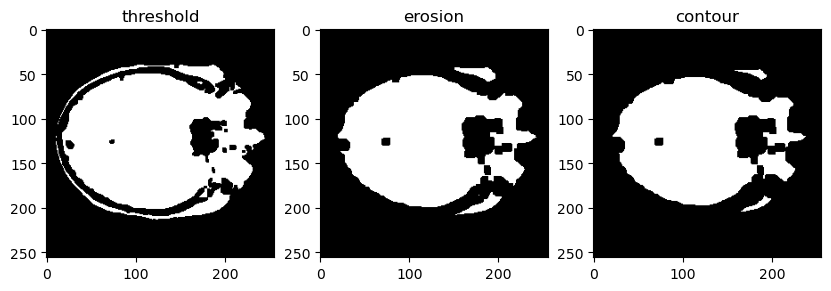

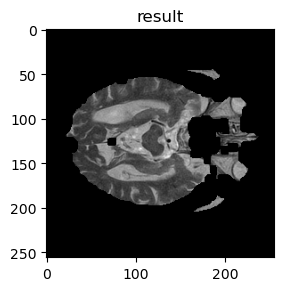

3751.5773406781295


In [81]:
##### here threshold doesnot work ####

import cv2
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from scipy.signal import convolve2d

kernel = np.ones((3,3),np.float32)/9 


I1= gaussian(Ii)
I2 = cv2.filter2D(I1, -1, kernel, borderType=cv2.BORDER_CONSTANT)
I3=cv2.erode(I2,kernel,iterations=1)
image = I3.astype(np.uint16)

thresh = cv2.threshold(image, 254, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]
I3=cv2.erode(thresh,kernel,iterations=2)


################################
'''countours , _ = cv2.findContours(I3,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(Ii,countours,-1,(255,255,255),2)
shape = I3.copy()
cv2.drawContours(shape, countours, -1, (0, 255, 0), 2)
cv2.imwrite('{}.png'.format('sunflower'), shape)'''

immmm = I3.astype(np.uint8)
'''countours , _ = cv2.findContours(immmm,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(Ii,countours,-1,(255,255,255),2)
shape = I3.copy()
cv2.drawContours(shape, countours, -1, (255, 255, 255), 2)
cv2.imwrite('{}.png'.format('sunflower'), shape)
'''
countours , _ = cv2.findContours(immmm,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
shape = I3.copy()
cv2.drawContours(shape, countours, -1, (0, 255, 0), 2)

#############################

I4=shape
I5=Ii*I4
#(thresh, im_bw) = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)








plt.figure(figsize=(10, 10))
plt.subplot(231)
plt.imshow(Ii, cmap='gray')
plt.title('original')
plt.subplot(232)
plt.imshow(I1, cmap='gray')
plt.title('gaussian')
plt.subplot(233)
plt.imshow(I2, cmap='gray')
plt.title('conv')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(231)
plt.imshow(thresh, cmap='gray')
plt.title('threshold')
plt.subplot(232)
plt.imshow(I3,cmap='gray')
plt.title('erosion')
plt.subplot(233)
plt.imshow(I4, cmap='gray')
plt.title('contour')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(232)
plt.imshow(I5, cmap='gray')
plt.title('result')
plt.show()
#im_gray = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
mm=np.max(I2)
print(mm)


# contour

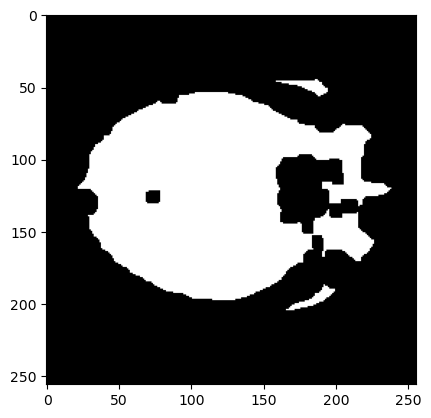

In [83]:
immmm = I3.astype(np.uint8)

#cv2.imwrite('{}.png'.format('sunflower'), shape)

countours , _ = cv2.findContours(immmm,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
shape = I3.copy()
cv2.drawContours(shape, countours, -1, (0, 255, 0), 2)


plt.imshow(shape, cmap="gray")
plt.show()